# 2.1.2 Unsupervised learning algorithms dendrogram
### The following script contains the following:

#### 1. Import libraries, additional requirements
#### 2. Import data
#### 3. Remove non-pertinent data 
#### 5. Create dendrogram
        - single
        - complete
        - average
        - ward
#### 6. Dimensionality reduction
        - PCA
#### 7. Rerun dendrogram methods with reduced data
---------------------------------------------------------------------------------------------------------------------------
## 1. Import libraries, additional requirements
---------------------------------------------------------------------------------------------------------------------------

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [5]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

# Turning off warning feature
import warnings
warnings.filterwarnings('ignore')

# Supress scientific notation for easier analysis profiling
pd.set_option('display.float_format', '{:.2f}'.format)

---------------------------------------------------------------------------------------------------------------------------
## 2. Import Data

In [9]:
# Create a path for importing
path = r'C:\Users\shrav\_Data_Analysis_CF\ML_ClimateWins_Project'

In [11]:
pleasant = pd.read_csv(os.path.join(path, '02 Data', 'Original_Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))


In [18]:
scaled = pd.read_csv(os.path.join(path, '02 Data', 'UnSupervised', 'weather_data_scaled.csv'))
scaled

,Unnamed: 0,DATE,MONTH,id,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0,19600101,1,-1.73,0.66,-0.03,0.83,-0.00,-1.10,-0.27,...,-0.44,0.76,-1.30,-0.81,-0.09,-0.02,0.37,-0.67,-0.52,-0.75
1,1,19600102,1,-1.73,0.24,-0.03,0.74,-0.00,-1.06,1.66,...,0.78,1.18,-1.26,-1.04,0.50,-0.02,-0.83,-0.55,-0.63,-0.41
2,2,19600103,1,-1.73,1.08,-0.03,1.28,-0.00,-1.25,0.16,...,0.78,1.18,-0.43,-1.14,-0.40,-0.02,-1.01,-0.07,0.05,-0.18
3,3,19600104,1,-1.73,-1.00,-0.03,1.46,-0.00,-0.82,-0.45,...,0.78,0.48,0.39,-1.18,0.67,-0.02,-1.04,-1.00,-0.16,-0.84
4,4,19600105,1,-1.73,0.24,-0.03,1.73,-0.00,-0.75,-0.16,...,-1.67,-0.36,1.73,-0.79,-0.49,-0.02,0.67,-1.51,-1.34,-1.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,22945,20221027,10,1.73,-1.83,-0.03,0.28,1.04,-0.01,-0.00,...,-0.44,-0.08,-0.00,-0.01,-0.01,-0.02,-0.02,-0.01,-0.00,-0.00
22946,22946,20221028,10,1.73,0.24,-0.03,0.10,0.98,-0.01,-0.00,...,-0.44,-0.08,-0.00,-0.01,-0.01,-0.02,-0.02,-0.01,-0.00,-0.00
22947,22947,20221029,10,1.73,-0.59,-0.03,0.01,0.72,-0.01,-0.00,...,-0.44,-0.08,-0.00,-0.01,-0.01,-0.02,-0.02,-0.01,-0.00,-0.00
22948,22948,20221030,10,1.73,-0.17,-0.03,0.37,0.49,-0.01,-0.00,...,-0.44,-0.08,-0.00,-0.01,-0.01,-0.02,-0.02,-0.01,-0.00,-0.00


In [20]:
# Merge data sets using (inner join)
merge = scaled.merge(pleasant, on='DATE')
merge

,Unnamed: 0,DATE,MONTH,id,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,...,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,19600101,1,-1.73,0.66,-0.03,0.83,-0.00,-1.10,-0.27,...,0,0,0,0,0,0,0,0,0,0
1,1,19600102,1,-1.73,0.24,-0.03,0.74,-0.00,-1.06,1.66,...,0,0,0,0,0,0,0,0,0,0
2,2,19600103,1,-1.73,1.08,-0.03,1.28,-0.00,-1.25,0.16,...,0,0,0,0,0,0,0,0,0,0
3,3,19600104,1,-1.73,-1.00,-0.03,1.46,-0.00,-0.82,-0.45,...,0,0,0,0,0,0,0,0,0,0
4,4,19600105,1,-1.73,0.24,-0.03,1.73,-0.00,-0.75,-0.16,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,22945,20221027,10,1.73,-1.83,-0.03,0.28,1.04,-0.01,-0.00,...,0,0,0,0,0,0,0,0,0,0
22946,22946,20221028,10,1.73,0.24,-0.03,0.10,0.98,-0.01,-0.00,...,0,0,0,0,0,0,0,0,0,0
22947,22947,20221029,10,1.73,-0.59,-0.03,0.01,0.72,-0.01,-0.00,...,0,0,0,0,0,0,0,0,0,0
22948,22948,20221030,10,1.73,-0.17,-0.03,0.37,0.49,-0.01,-0.00,...,0,0,0,0,0,0,0,0,0,0


---------------------------------------------------------------------------------------------------------------------------
## 3. Remove non-pertinent data

In [23]:
# Drop the DATE and MONTH data as those numbers are not scaled with the rest.
drop_features = merge.drop(['MONTH',
                         # GDANSK features
                         'GDANSK_cloud_cover', 'GDANSK_humidity',
                         'GDANSK_precipitation', 'GDANSK_snow_depth',
                         'GDANSK_temp_mean', 'GDANSK_temp_min', 'GDANSK_temp_max',
                         # ROMA features
                         'ROMA_cloud_cover', 'ROMA_humidity', 'ROMA_pressure',
                         'ROMA_sunshine', 'ROMA_temp_mean',
                         # TOURS features
                         'TOURS_humidity', 'TOURS_pressure',
                         'TOURS_global_radiation', 'TOURS_precipitation',
                         'TOURS_temp_mean', 'TOURS_temp_min', 'TOURS_temp_max'], axis=1)
drop_features

,Unnamed: 0,DATE,id,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,...,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,19600101,-1.73,0.66,-0.03,0.83,-0.00,-1.10,-0.27,-0.18,...,0,0,0,0,0,0,0,0,0,0
1,1,19600102,-1.73,0.24,-0.03,0.74,-0.00,-1.06,1.66,-0.18,...,0,0,0,0,0,0,0,0,0,0
2,2,19600103,-1.73,1.08,-0.03,1.28,-0.00,-1.25,0.16,-0.18,...,0,0,0,0,0,0,0,0,0,0
3,3,19600104,-1.73,-1.00,-0.03,1.46,-0.00,-0.82,-0.45,-0.18,...,0,0,0,0,0,0,0,0,0,0
4,4,19600105,-1.73,0.24,-0.03,1.73,-0.00,-0.75,-0.16,-0.18,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,22945,20221027,1.73,-1.83,-0.03,0.28,1.04,-0.01,-0.00,-0.18,...,0,0,0,0,0,0,0,0,0,0
22946,22946,20221028,1.73,0.24,-0.03,0.10,0.98,-0.01,-0.00,-0.18,...,0,0,0,0,0,0,0,0,0,0
22947,22947,20221029,1.73,-0.59,-0.03,0.01,0.72,-0.01,-0.00,-0.18,...,0,0,0,0,0,0,0,0,0,0
22948,22948,20221030,1.73,-0.17,-0.03,0.37,0.49,-0.01,-0.00,-0.18,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# Convert to DATETIME


# Convert 'DATE' column to string
drop_features['DATE'] = drop_features['DATE'].astype(str)

# Convert string dates to datetime format
drop_features['DATE'] = pd.to_datetime(drop_features['DATE'], format='%Y%m%d')

# Verify the conversion
drop_features['DATE']

0       1960-01-01
1       1960-01-02
2       1960-01-03
3       1960-01-04
4       1960-01-05
           ...    
22945   2022-10-27
22946   2022-10-28
22947   2022-10-29
22948   2022-10-30
22949   2022-10-31
Name: DATE, Length: 22950, dtype: datetime64[ns]

In [27]:
# Define the start and end dates of the range
start_date = '2012-01-01'
end_date = '2022-10-31'

# Filter data based on the specified range
features = drop_features[(drop_features['DATE'] >= start_date) & (drop_features['DATE'] <= end_date)]

# View new dataframe features
features

,Unnamed: 0,DATE,id,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,...,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
18993,18993,2012-01-01,1.13,1.08,-0.30,0.28,0.11,-1.10,-0.45,-0.18,...,0,0,0,0,0,0,0,0,0,0
18994,18994,2012-01-02,1.14,1.08,1.34,1.01,-0.19,-1.25,1.06,-0.18,...,0,0,0,0,0,0,0,0,0,0
18995,18995,2012-01-03,1.14,-0.17,1.34,-0.35,0.92,-0.88,0.96,-0.18,...,0,0,0,0,0,0,0,0,0,0
18996,18996,2012-01-04,1.14,-0.17,4.07,-0.53,0.75,-0.96,-0.27,-0.18,...,0,0,0,0,0,0,0,0,0,0
18997,18997,2012-01-05,1.14,0.66,7.75,-0.26,-1.50,-1.17,1.80,-0.18,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,22945,2022-10-27,1.73,-1.83,-0.03,0.28,1.04,-0.01,-0.00,-0.18,...,0,0,0,0,0,0,0,0,0,0
22946,22946,2022-10-28,1.73,0.24,-0.03,0.10,0.98,-0.01,-0.00,-0.18,...,0,0,0,0,0,0,0,0,0,0
22947,22947,2022-10-29,1.73,-0.59,-0.03,0.01,0.72,-0.01,-0.00,-0.18,...,0,0,0,0,0,0,0,0,0,0
22948,22948,2022-10-30,1.73,-0.17,-0.03,0.37,0.49,-0.01,-0.00,-0.18,...,0,0,0,0,0,0,0,0,0,0


In [29]:
features.drop(columns=['DATE'], axis=1, inplace=True)

In [31]:
features

,Unnamed: 0,id,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
18993,18993,1.13,1.08,-0.30,0.28,0.11,-1.10,-0.45,-0.18,-1.07,...,0,0,0,0,0,0,0,0,0,0
18994,18994,1.14,1.08,1.34,1.01,-0.19,-1.25,1.06,-0.18,-1.07,...,0,0,0,0,0,0,0,0,0,0
18995,18995,1.14,-0.17,1.34,-0.35,0.92,-0.88,0.96,-0.18,-0.28,...,0,0,0,0,0,0,0,0,0,0
18996,18996,1.14,-0.17,4.07,-0.53,0.75,-0.96,-0.27,-0.18,-0.39,...,0,0,0,0,0,0,0,0,0,0
18997,18997,1.14,0.66,7.75,-0.26,-1.50,-1.17,1.80,-0.18,-1.00,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,22945,1.73,-1.83,-0.03,0.28,1.04,-0.01,-0.00,-0.18,0.72,...,0,0,0,0,0,0,0,0,0,0
22946,22946,1.73,0.24,-0.03,0.10,0.98,-0.01,-0.00,-0.18,0.19,...,0,0,0,0,0,0,0,0,0,0
22947,22947,1.73,-0.59,-0.03,0.01,0.72,-0.01,-0.00,-0.18,0.35,...,0,0,0,0,0,0,0,0,0,0
22948,22948,1.73,-0.17,-0.03,0.37,0.49,-0.01,-0.00,-0.18,0.28,...,0,0,0,0,0,0,0,0,0,0


---------------------------------------------------------------------------------------------------------------------------
## 5. Create dendrograms
- ### **single**

Text(0.5, 0.98, 'All Weather Stations - Dendrogram Single Method')

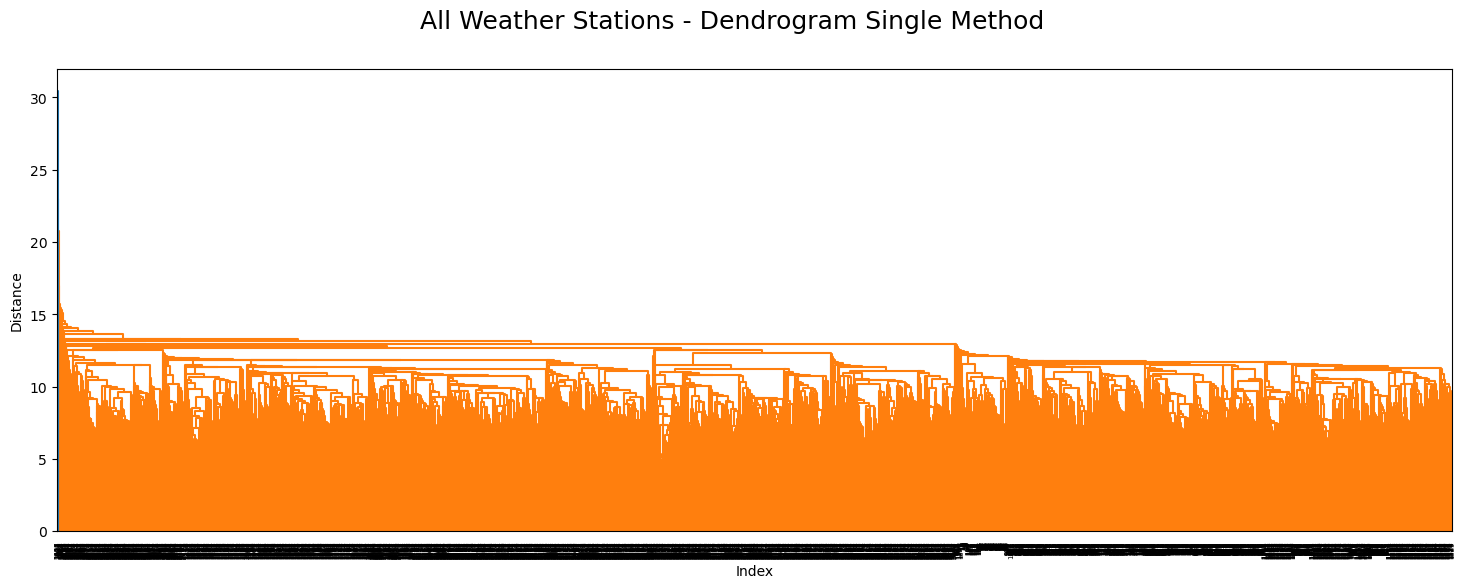

In [34]:
distance_single = linkage(features, method="single")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("All Weather Stations - Dendrogram Single Method",fontsize=18)

---------------------------------------------------------------------------------------------------------------------------
- ### **Complete**

Text(0.5, 0.98, 'All Weather Stations - Dendrogram Complete Method')

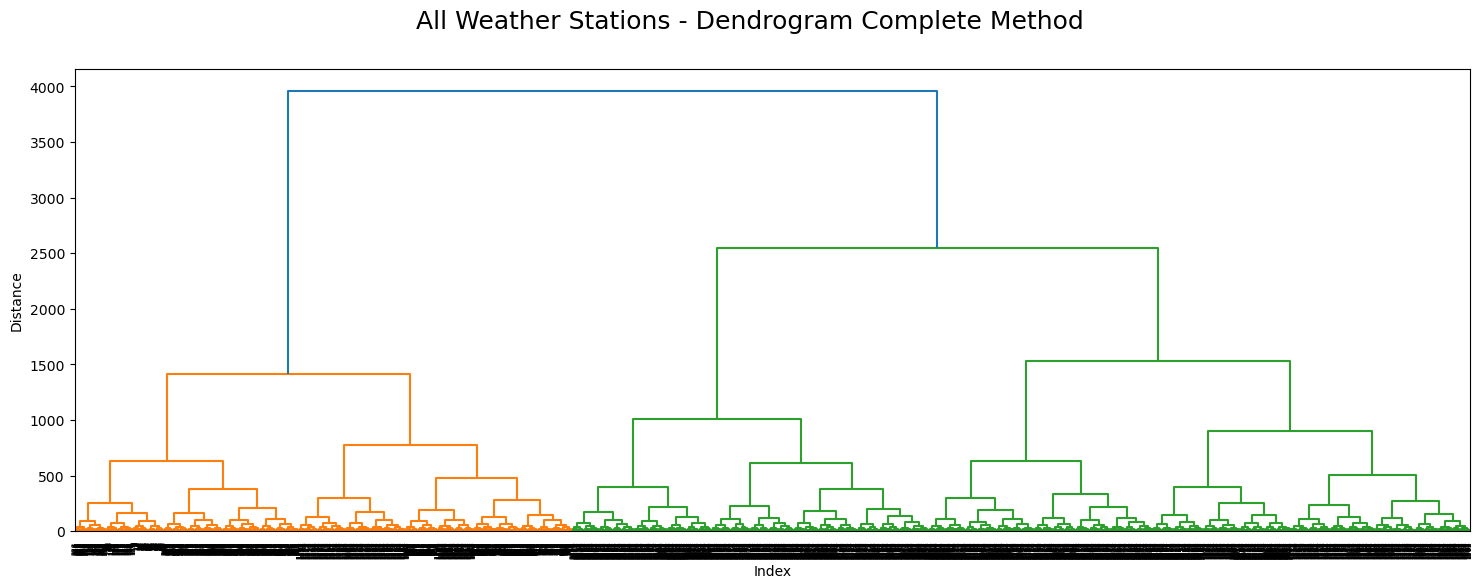

In [39]:
distance_complete = linkage(features, method="complete")
plt.figure(figsize=(18,6))
dendrogram(distance_complete, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("All Weather Stations - Dendrogram Complete Method",fontsize=18)

---------------------------------------------------------------------------------------------------------------------------
- ### **Average**

Text(0.5, 0.98, 'All Weather Stations - Dendrogram Average Method')

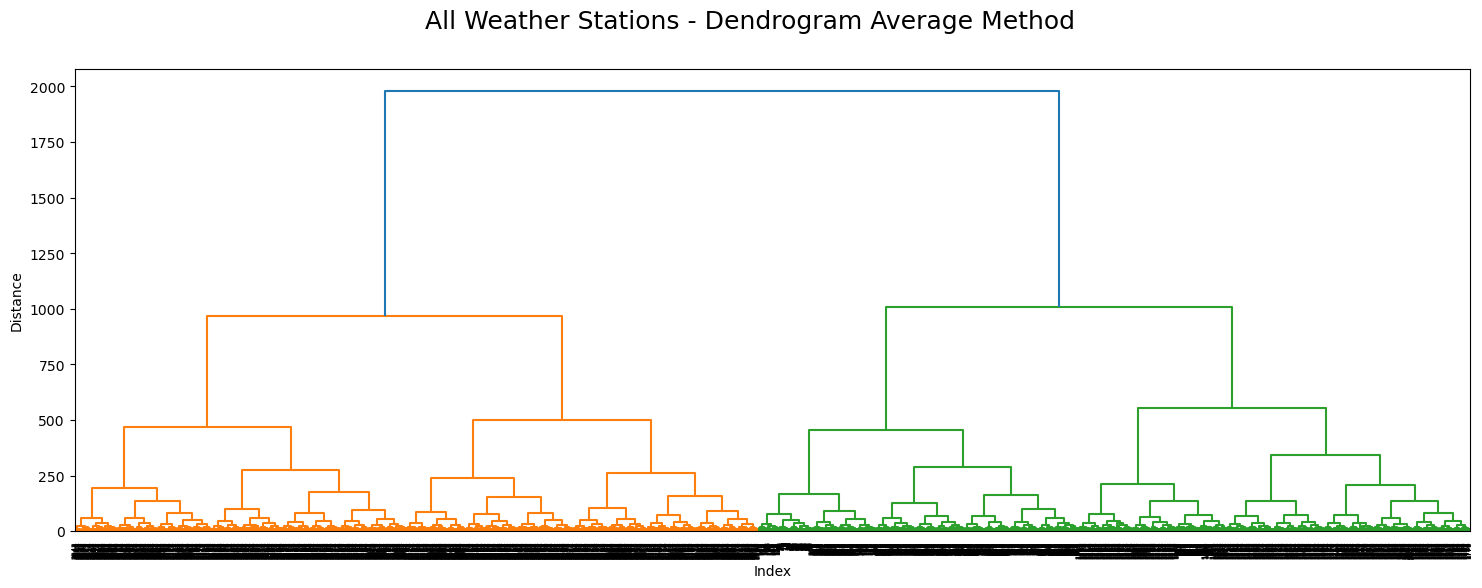

In [44]:
distance_average = linkage(features, method="average")
plt.figure(figsize=(18,6))
dendrogram(distance_average, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("All Weather Stations - Dendrogram Average Method",fontsize=18)

---------------------------------------------------------------------------------------------------------------------------
- ### **Ward**

Text(0.5, 0.98, 'All Weather Stations - Dendrogram Ward Method')

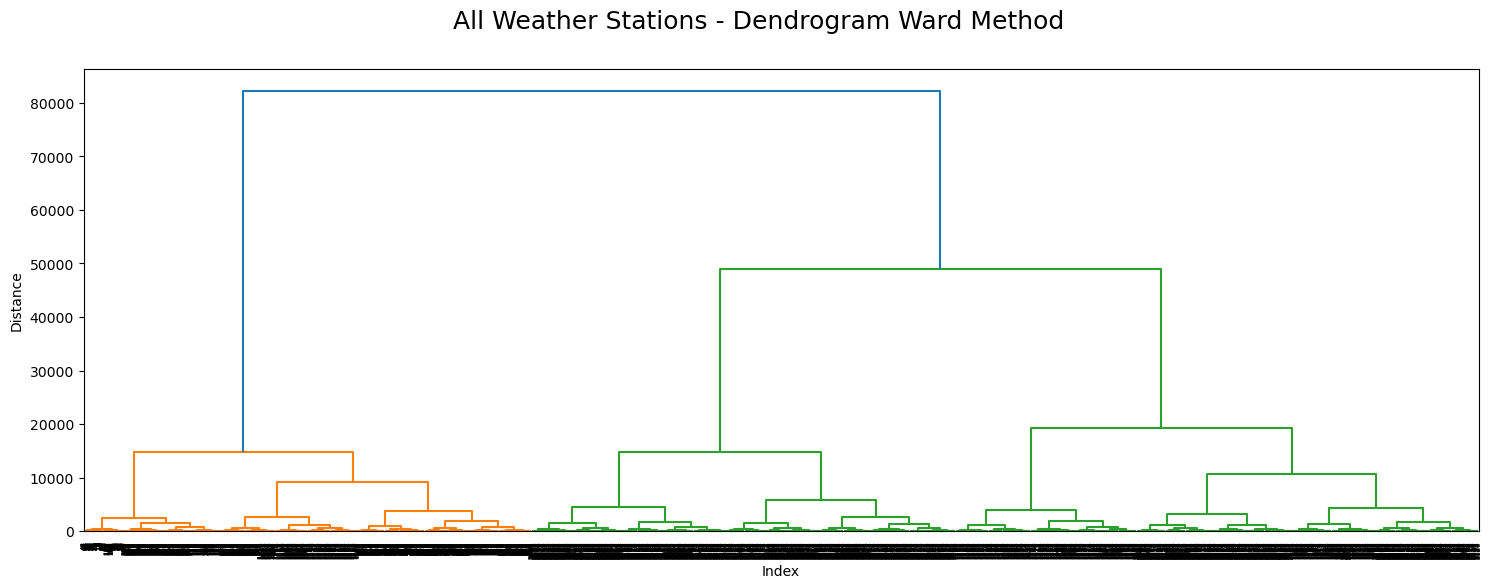

In [47]:
distance_ward = linkage(features, method="ward")
plt.figure(figsize=(18,6))
dendrogram(distance_ward, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("All Weather Stations - Dendrogram Ward Method",fontsize=18)

---------------------------------------------------------------------------------------------------------------------------
## 6. Dimensionality reduction
- **PCA**

In [50]:
#Run the PCA model, reducing to 2 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features)

In [52]:
principalComponents

array([[-1.97800284e+03, -5.74969729e+00],
       [-1.97700273e+03, -5.85988094e+00],
       [-1.97600306e+03, -6.19769310e+00],
       ...,
       [ 1.97600056e+03,  1.50017229e+00],
       [ 1.97699968e+03,  5.27734313e-01],
       [ 1.97799847e+03, -1.16392463e+00]])

In [54]:
#Make a dataframe of the new components
dfPCA = pd.DataFrame(principalComponents, columns=['PCA1', 'PCA2'])
dfPCA

,PCA1,PCA2
0,-1978.00,-5.75
1,-1977.00,-5.86
2,-1976.00,-6.20
3,-1975.00,-6.43
4,-1974.00,-7.59
...,...,...
3952,1974.00,1.19
3953,1975.00,1.40
3954,1976.00,1.50
3955,1977.00,0.53


In [56]:
# Note: Q: add binary outcomes for all weather stations?

---------------------------------------------------------------------------------------------------------------------------
## 7. Rerun dendrogram methods with reduced data

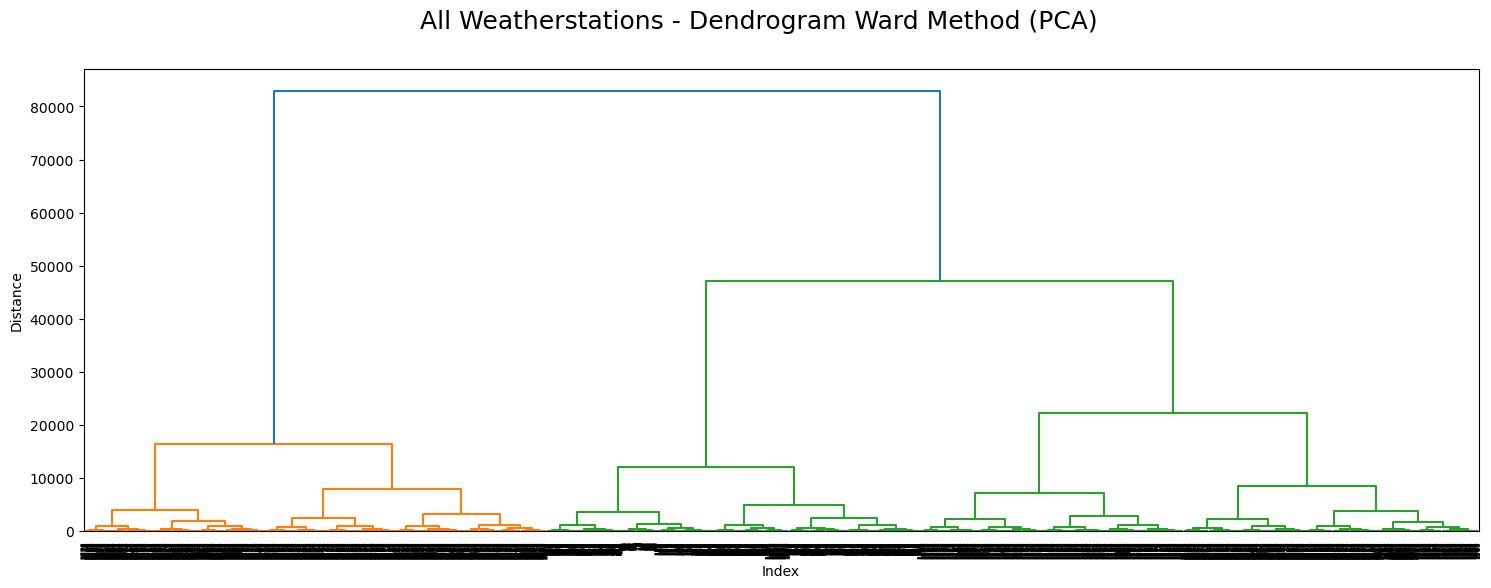

In [76]:
distance_ward = linkage(dfPCA, method="ward")
plt.figure(figsize=(18,6))
dendrogram(distance_ward, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("All Weatherstations - Dendrogram Ward Method (PCA)",fontsize=18)

# Specify the path and file name
output_file = r"C:\Users\shrav\_Data_Analysis_CF\ML_ClimateWins_Project\04 Analysis\Visualizations\All Weatherstations - Dendrogram Ward Method (PCA).png"

# Save the plot as a PNG file at the specified location
plt.savefig(output_file)

# Display the plot
plt.show()

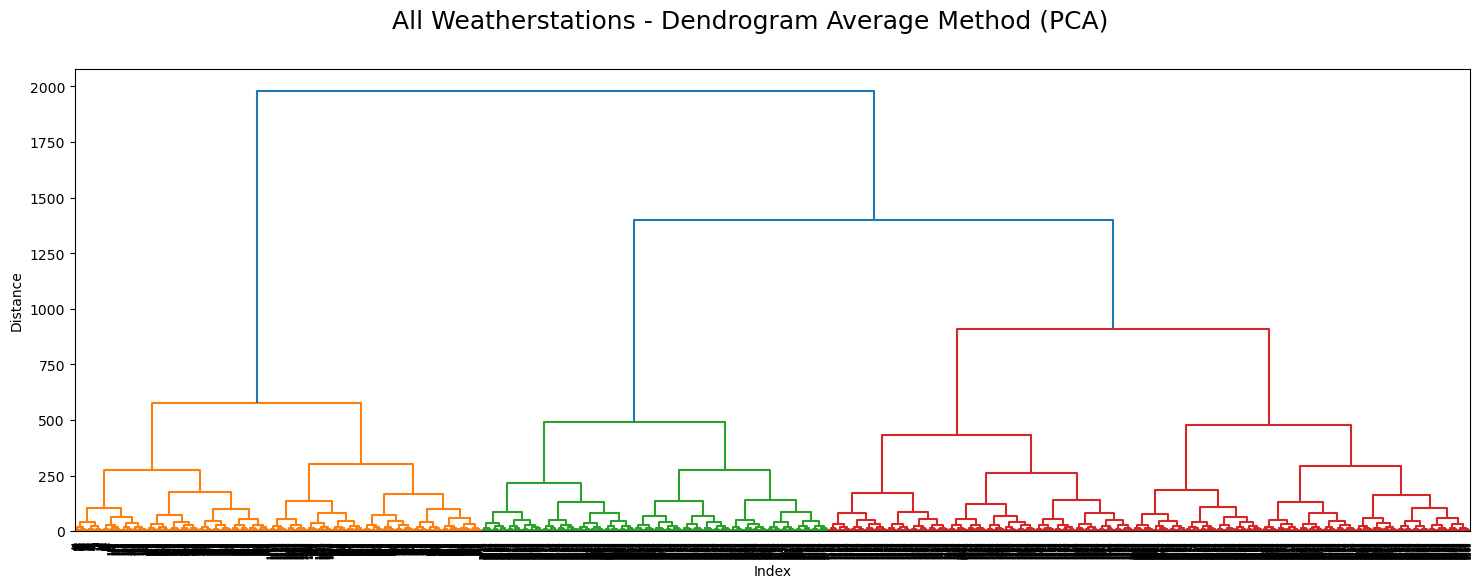

In [74]:
distance_average_pca = linkage(dfPCA, method="average")
plt.figure(figsize=(18,6))
dendrogram(distance_average_pca, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("All Weatherstations - Dendrogram Average Method (PCA)",fontsize=18)

# Specify the path and file name
output_file = r"C:\Users\shrav\_Data_Analysis_CF\ML_ClimateWins_Project\04 Analysis\Visualizations\All Weatherstations - Dendrogram Average Method (PCA).png"

# Save the plot as a PNG file at the specified location
plt.savefig(output_file)

# Display the plot
plt.show()

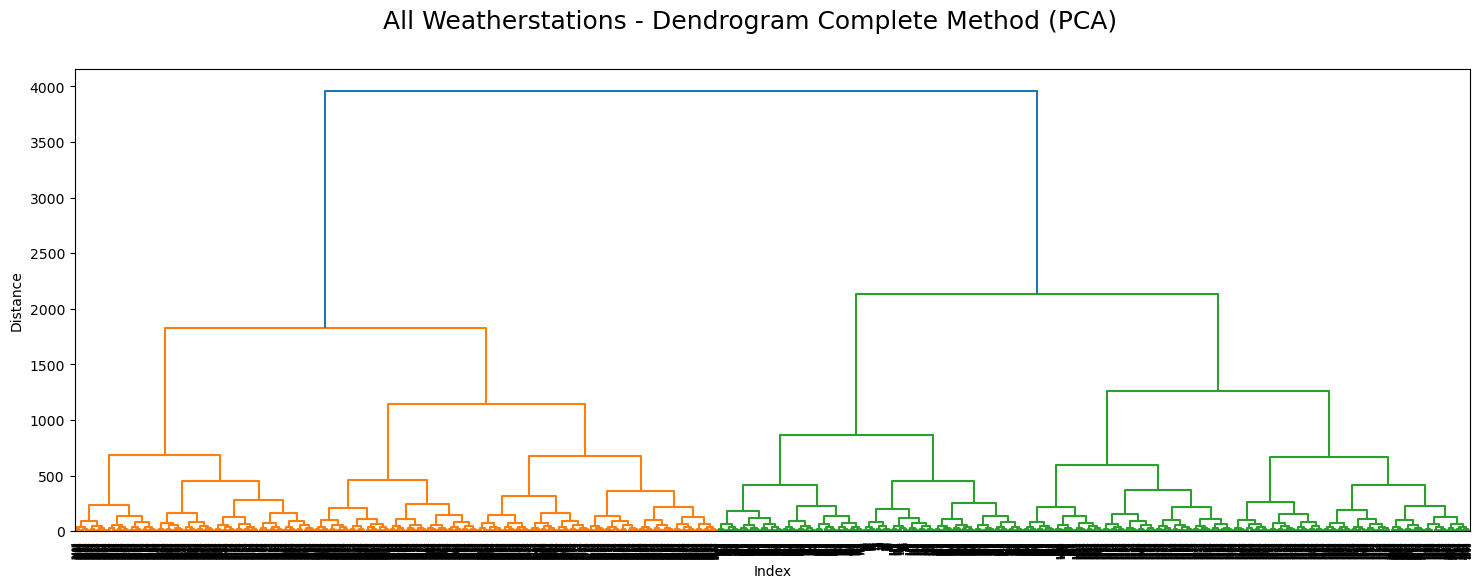

In [72]:
distance_complete_pca = linkage(dfPCA, method="complete")
plt.figure(figsize=(18,6))
dendrogram(distance_complete_pca, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("All Weatherstations - Dendrogram Complete Method (PCA)",fontsize=18)

# Specify the path and file name
output_file = r"C:\Users\shrav\_Data_Analysis_CF\ML_ClimateWins_Project\04 Analysis\Visualizations\All Weatherstations - Dendrogram Complete Method (PCA).png"

# Save the plot as a PNG file at the specified location
plt.savefig(output_file)

# Display the plot
plt.show()

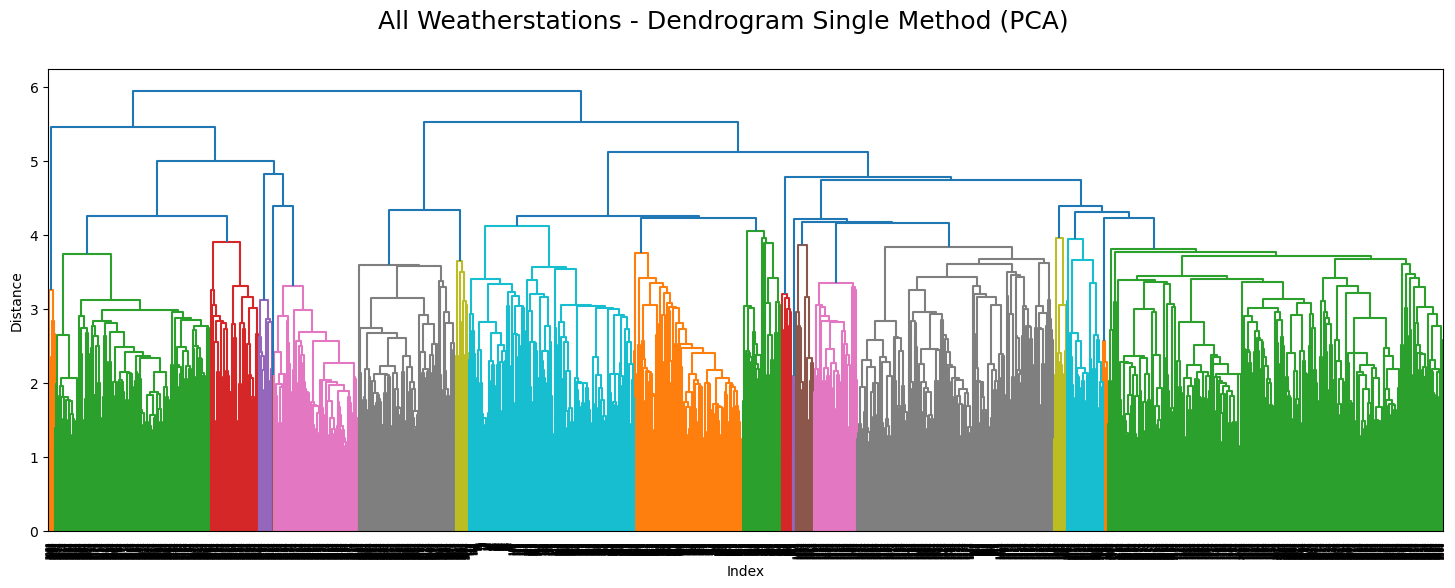

In [70]:
distance_single_pca = linkage(dfPCA, method="single")
plt.figure(figsize=(18,6))
dendrogram(distance_single_pca, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("All Weatherstations - Dendrogram Single Method (PCA)",fontsize=18)

# Specify the path and file name
output_file = r"C:\Users\shrav\_Data_Analysis_CF\ML_ClimateWins_Project\04 Analysis\Visualizations\All Weatherstations - Dendrogram Single Method (PCA).png"

# Save the plot as a PNG file at the specified location
plt.savefig(output_file)

# Display the plot
plt.show()

# Export data sets or pca reduction data

In [68]:
dfPCA.to_csv(os.path.join(path,'02 Data', 'UnSupervised', 'all-weather-stations-last-decade-pca.csv'),index=False)

--------------------------------------------------------------------------------------------------------------------------